In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('extracted_log.csv')

In [24]:
data.head(5)

,evaluate,wall_time,step,measure/reconstruction/error,measure/activation/mean,measure/activation/std,measure/parameters/W/mean,measure/parameters/b_h/mean,measure/parameters/b_v/mean,measure/reconstruction_1/hamming,...,kfold-intern,batch_size,class,visible_size,hidden_size,regularization,learning_rate,sampling_method,momentum,path
0,0,1.542844e+09,1,0.124222,5.955204,14.738444,-0.109463,-1.570596,-0.017528,3.057971,...,0,10,RBM,702,500,NoRegularization-0.0,ConstantLearningRate-0.05,CD-1,1,kfold=3/kfold-intern=0/batch_size=10/class=RBM...
1,1,1.542844e+09,11,0.117921,7.047431,13.660465,-0.110493,-1.671679,-0.057376,2.919631,...,0,10,RBM,702,500,NoRegularization-0.0,ConstantLearningRate-0.05,CD-1,1,kfold=3/kfold-intern=0/batch_size=10/class=RBM...
2,2,1.542844e+09,21,0.109495,6.374177,9.585950,-0.113326,-1.672066,-0.090734,2.944664,...,0,10,RBM,702,500,NoRegularization-0.0,ConstantLearningRate-0.05,CD-1,1,kfold=3/kfold-intern=0/batch_size=10/class=RBM...
3,3,1.542844e+09,31,0.102354,6.297760,7.753239,-0.117138,-1.642134,-0.119853,2.836627,...,0,10,RBM,702,500,NoRegularization-0.0,ConstantLearningRate-0.05,CD-1,1,kfold=3/kfold-intern=0/batch_size=10/class=RBM...
4,4,1.542844e+09,41,0.095702,6.442688,7.877815,-0.121068,-1.637922,-0.144640,2.762846,...,0,10,RBM,702,500,NoRegularization-0.0,ConstantLearningRate-0.05,CD-1,1,kfold=3/kfold-intern=0/batch_size=10/class=RBM...


In [25]:
data.columns

Index(['evaluate', 'wall_time', 'step', 'measure/reconstruction/error',
       'measure/activation/mean', 'measure/activation/std',
       'measure/parameters/W/mean', 'measure/parameters/b_h/mean',
       'measure/parameters/b_v/mean', 'measure/reconstruction_1/hamming',
       'details/measure/top-1/evaluate-0/train',
       'details/measure/top-1/evaluate-0/validation',
       'details/measure/top-1/evaluate-1/train',
       'details/measure/top-1/evaluate-1/validation',
       'details/measure/top-1/evaluate-2/train',
       'details/measure/top-1/evaluate-2/validation',
       'details/measure/top-1/evaluate-3/train',
       'details/measure/top-1/evaluate-3/validation',
       'details/measure/top-1/evaluate-4/train',
       'details/measure/top-1/evaluate-4/validation',
       'details/measure/top-1/evaluate-5/train',
       'details/measure/top-1/evaluate-5/validation',
       'measure/evaluate/top-1/RMSE_train',
       'measure/evaluate/top-1/RMSE_validation',
       'measure/

# Best hyperparameters

In [125]:
def evaluate(column):
    parameters = ['class', 'hidden_size', 'learning_rate', 'kfold', 'kfold-intern']

    #result = 
    return data \
        .groupby(parameters).max(level=column) \
        .groupby(parameters[:-1]).mean() \
        .groupby(parameters[:-2]).mean()[[column]].reset_index()

columns_evaluated = ['measure/evaluate/expectation/normalized/validation', 'measure/evaluate/top-5/validation', 'measure/evaluate/top-1/validation']
evaluate(columns_evaluated[0])
#print(accuracy.max(), accuracy.max().index)

,class,hidden_size,learning_rate,measure/evaluate/expectation/normalized/validation
0,RBM,100,ConstantLearningRate-0.01,0.069885
1,RBM,100,ConstantLearningRate-0.05,0.068611
2,RBM,100,ConstantLearningRate-0.1,0.081819
3,RBM,500,ConstantLearningRate-0.01,0.037323
4,RBM,500,ConstantLearningRate-0.05,0.069446
5,RBM,500,ConstantLearningRate-0.1,0.113220
6,RBM,1000,ConstantLearningRate-0.01,0.036094
7,RBM,1000,ConstantLearningRate-0.05,0.095139
8,RBM,1000,ConstantLearningRate-0.1,0.118353
9,RBMCF,100,ConstantLearningRate-0.05,0.122763


In [103]:
pd.concat([accuracy.groupby('class').idxmax().to_frame(), accuracy.groupby('class').max()])

,measure/evaluate/expectation/normalized/validation,0
class,,
RBM,"(RBM, 1000, ConstantLearningRate-0.1)",NaN
RBMCF,"(RBMCF, 100, ConstantLearningRate-0.2)",NaN
RBM,NaN,0.118353
RBMCF,NaN,0.158949


In [6]:
#information = ['id', 'batch_size', 'kfold', 'kfold-intern', 'batch_size', "class", 'visible_size', 'hidden_size', 'regularization', 'learning_rate', 'sampling_method', 'momentum']

#data[information].head(5).apply(lambda x: x.astype(str).str.cat(sep='/'), axis=1)
#details = data[information].apply(lambda x: '/'.join([f'{i}={j}' for i,j in zip(x.index, x.values)]), axis=1)
#data['details'] = details
#data.head(3)

In [10]:
columns = [f'details/measure/expectation/normalized/evaluate-{i}/validation' for i in range(6)]
full_columns = columns + ['measure/evaluate/expectation/normalized/train', 'measure/evaluate/expectation/normalized/validation']

data[data["class"] == 'RBMCF'][full_columns].idxmax()

details/measure/expectation/normalized/evaluate-0/validation    10645
details/measure/expectation/normalized/evaluate-1/validation     7057
details/measure/expectation/normalized/evaluate-2/validation    10386
details/measure/expectation/normalized/evaluate-3/validation    10668
details/measure/expectation/normalized/evaluate-4/validation    10365
details/measure/expectation/normalized/evaluate-5/validation     8585
measure/evaluate/expectation/normalized/train                    5246
measure/evaluate/expectation/normalized/validation              17977
dtype: int64

kfold=2/kfold-intern=1/batch_size=10/class=RBMCF/visible_size=702/hidden_size=100/regularization=NoRegularization-0.0/learning_rate=ConstantLearningRate-0.2/sampling_method=CD-1/momentum=1/1542855678.6966267/events.out.tfevents.1542855682.paulo-notebook


Text(0.5, 1.0, 'RBM-CF - Best validation performance')

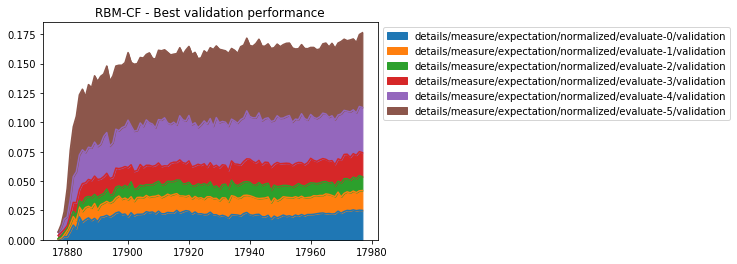

In [44]:
detail_filter = data.iloc[17977].path

print(detail_filter)
#ax = data[data['details'].str.contains(detail_filter)][full_columns].plot()
ax = (data[data['path'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM-CF - Best validation performance')

In [14]:
data[data["class"] == 'RBM'][full_columns].idxmax()

details/measure/expectation/normalized/evaluate-0/validation    11099
details/measure/expectation/normalized/evaluate-1/validation     5620
details/measure/expectation/normalized/evaluate-2/validation     9591
details/measure/expectation/normalized/evaluate-3/validation     7454
details/measure/expectation/normalized/evaluate-4/validation    11406
details/measure/expectation/normalized/evaluate-5/validation    11396
measure/evaluate/expectation/normalized/train                   11407
measure/evaluate/expectation/normalized/validation              11406
dtype: int64

kfold=4/kfold-intern=0/batch_size=10/class=RBM/visible_size=702/hidden_size=1000/regularization=NoRegularization-0.0/learning_rate=ConstantLearningRate-0.1/sampling_method=CD-1/momentum=1/1542903493.2974353/events.out.tfevents.1542903497.ff69adec0143


Text(0.5, 1.0, 'RBM - Best validation performance')

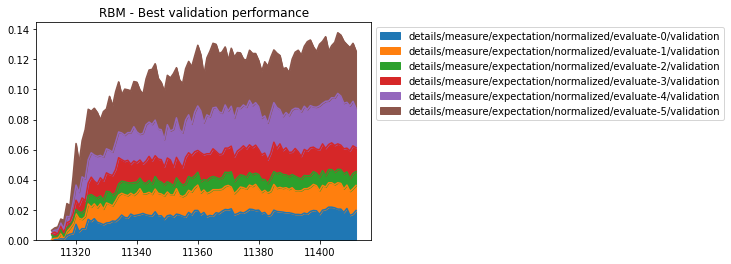

In [39]:
detail_filter = data.iloc[11406].path

print(detail_filter)
#ax = data[data['path'].str.contains(detail_filter)][columns].plot()
ax = (data[data['path'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM - Best validation performance')

In [19]:
#data[(data["class"] == 'RBM') & (data['path'].str.contains('id=50'))][full_columns].idxmax()

Text(0.5, 1.0, 'RBM - Validation performance to the best 5º effect in the last eppoch')

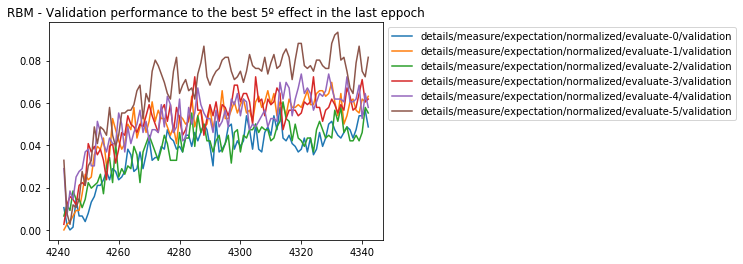

In [20]:
detail_filter = data.iloc[4278].path[7:]

ax = data[data['path'].str.contains(detail_filter)][columns].plot()
#ax = (data[data['path'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM - Validation performance to the best 5º effect in the last eppoch')